# Bivariate Time Series Manipulation & Visualization

## Overview

<style>
    table.custom-table {
        max-width: 1000px;
        width: 100%;
        margin: 0 auto; /* centers the table on the page */
    }

    table.custom-table td {
        background-color: #fff;
    }
    
    table.custom-table th, table.custom-table td {
        text-align: center;
        vertical-align: middle;
        padding: 5px;
        width: 333px; /* distribute the total width equally among three columns */
    }

    table.custom-table img {
        width: 100%;
        display: block; /* removes any gap under the image */
    }
</style>


<table class="custom-table">
    <thead>
        <tr>
            <th>Output: Accumulated Generation</th>
            <th>Output: Technology Relationship</th>
            <th>Input: Hourly Energy Generation</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>
                <img src="src/02_output_2.png" alt="Solar Image 1">
            </td>
            <td>
                <img src="src/02_output_1.png" alt="Solar Image 2">
            </td>
            <td>
                <img src="src/02_input.png" alt="Solar Image 3">
            </td>
        </tr>
    </tbody>
</table>


## Data

In [1]:
import pandas as pd

df = pd.read_csv('../../../data/energy_generation_hourly_year.csv', index_col=0, parse_dates=True)
df

,Coal,Cogeneration,Combined Cycle (Gas),Eolic,Hydraulic,Non-Renewable Residues,Nuclear,Pumped Storage Hydropower,Renewables Other,Solar Photovoltaic,Solar Thermal
time,,,,,,,,,,,
2022-09-01 00:00:00,695.00,1155.1,14748.950,4387.050,899.675,273.7,6869.9,201.600,516.600,1.000,287.7
2022-09-01 01:00:00,750.00,1162.1,14255.600,4008.900,850.200,271.6,6881.9,117.700,514.400,1.000,247.7
2022-09-01 02:00:00,777.50,1153.9,13644.750,3547.500,798.100,272.6,6873.9,78.000,512.700,1.200,239.7
2022-09-01 03:00:00,802.50,1146.0,13736.500,3188.650,795.500,273.0,6879.9,78.000,512.500,0.200,209.7
2022-09-01 04:00:00,816.25,1152.8,13706.825,2594.225,821.600,271.7,6873.9,78.100,513.100,0.400,231.5
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31 19:00:00,472.50,2084.9,9390.275,2780.800,2335.900,228.4,6853.0,1611.600,493.575,5212.173,1691.6
2023-08-31 20:00:00,455.00,2141.1,10097.725,3072.800,3860.400,230.9,6857.0,1910.850,500.600,861.975,1039.1
2023-08-31 21:00:00,509.10,2149.1,11359.425,3057.150,3852.325,236.9,6864.0,1343.375,505.100,21.400,668.8


In [3]:
df_renewable = df[['Solar Photovoltaic', 'Eolic']]

<Axes: xlabel='time'>

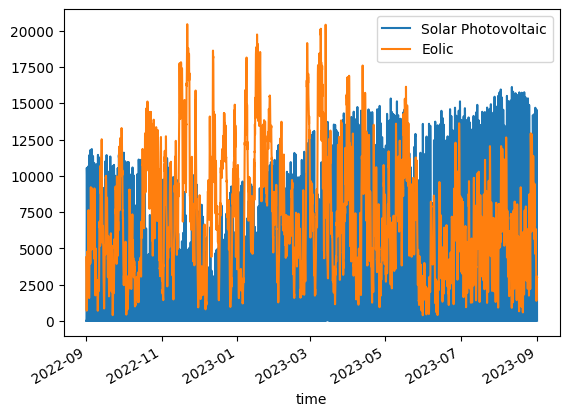

In [4]:
df_renewable.plot()

## Resampling the Time
- [Date offset `rule` list](https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects)
- [Pandas plot `kind` list](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

### Daily

<Axes: xlabel='time'>

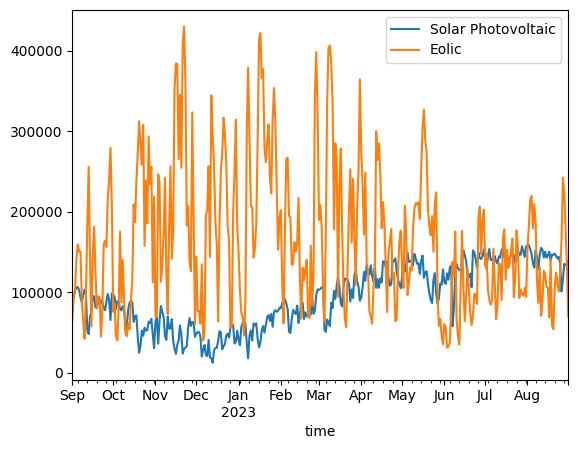

In [5]:
df_renewable.resample('D').sum().plot()

### Monthly

C:\Users\RafaelAndreo_6gt1g09\AppData\Local\Temp\ipykernel_17220\1733506419.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_renewable.resample('M').sum().plot()


<Axes: xlabel='time'>

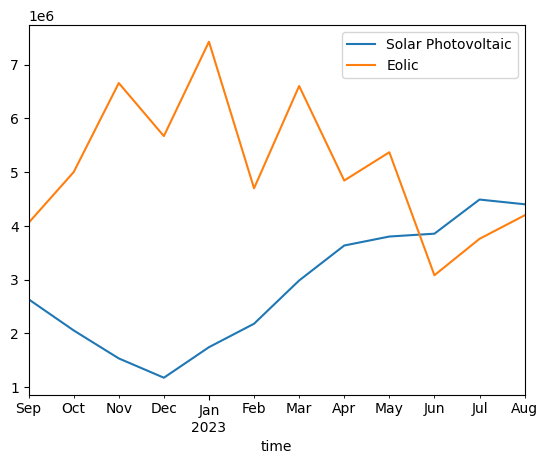

In [6]:
df_renewable.resample('M').sum().plot()

<Axes: xlabel='time'>

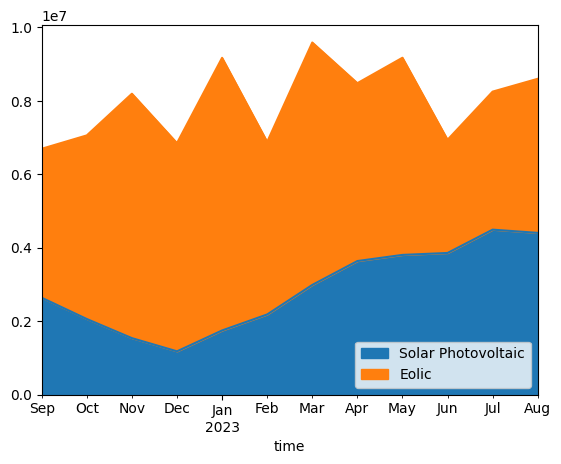

In [7]:
df_renewable.resample('ME').sum().plot.area()

<Axes: xlabel='time'>

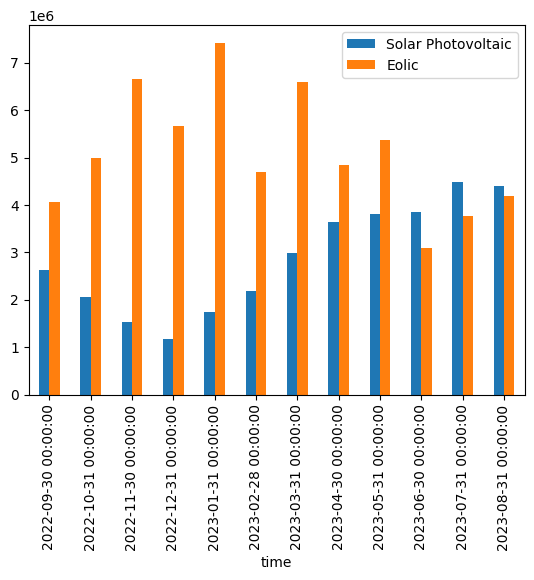

In [8]:
df_renewable.resample('ME').sum().plot.bar()

## Visualize Time Series Correlation

In [9]:
df_renewable

,Solar Photovoltaic,Eolic
time,,
2022-09-01 00:00:00,1.000,4387.050
2022-09-01 01:00:00,1.000,4008.900
2022-09-01 02:00:00,1.200,3547.500
2022-09-01 03:00:00,0.200,3188.650
2022-09-01 04:00:00,0.400,2594.225
...,...,...
2023-08-31 19:00:00,5212.173,2780.800
2023-08-31 20:00:00,861.975,3072.800
2023-08-31 21:00:00,21.400,3057.150


<Axes: xlabel='Solar Photovoltaic', ylabel='Eolic'>

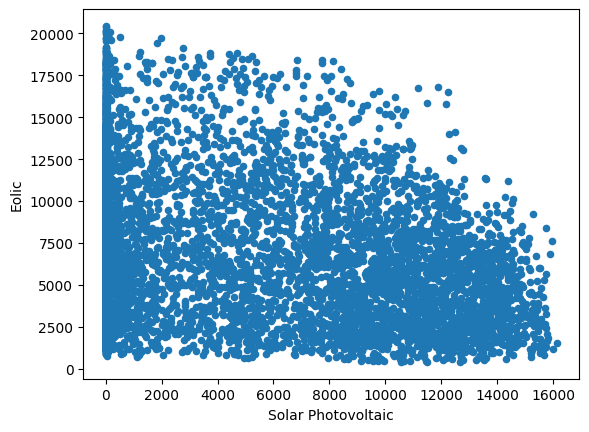

In [10]:
df_renewable.plot.scatter(x='Solar Photovoltaic', y='Eolic')

In [10]:
df_renewable_weekly = df_renewable.resample('7D').mean()

<Axes: xlabel='Solar Photovoltaic', ylabel='Eolic'>

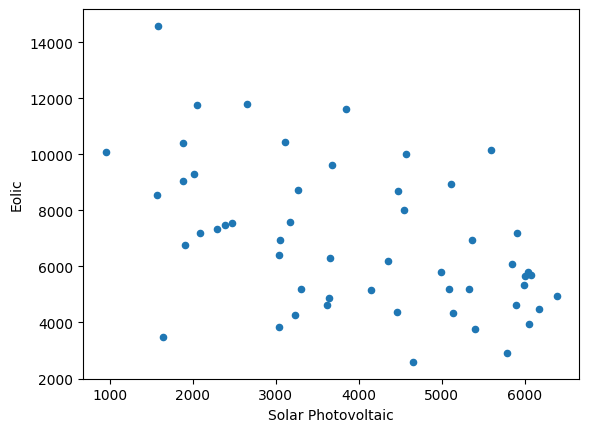

In [11]:
df_renewable.resample('7D').mean().plot.scatter(x='Solar Photovoltaic', y='Eolic')

## Data Visualization with Plotly

- [Plotly Express Overview](https://plotly.com/python/plotly-express/#overview)

In [8]:
import plotly.express as px

px.scatter(df_renewable.resample('7D').mean().reset_index(), x='Solar Photovoltaic', y='Eolic', width=800, height=600)

In [6]:
px.scatter(df_renewable.resample('7D').mean().reset_index(), x='Solar Photovoltaic', y='Eolic', hover_data=[df_renewable.resample('7D').mean().index], width=800, height=600, trendline='ols')

In [12]:
df_renewable_weekly_total = df_renewable.resample('7D').sum()

In [13]:
px.area(df_renewable_weekly_total)
        #    x='Solar Photovoltaic', 
        #    y='Eolic', 
        #    hover_data=[df_renewable.resample('7D').mean().index], 
        #    width=800, 
        #    height=600, 
        #    trendline='ols')


## Pivot Tables

### Transform object to DataFrame

> Only if you don't have a DataFrame yet.

In [14]:
df_renewable

,Solar Photovoltaic,Eolic
time,,
2022-09-01 00:00:00,1.000,4387.050
2022-09-01 01:00:00,1.000,4008.900
2022-09-01 02:00:00,1.200,3547.500
2022-09-01 03:00:00,0.200,3188.650
2022-09-01 04:00:00,0.400,2594.225
...,...,...
2023-08-31 19:00:00,5212.173,2780.800
2023-08-31 20:00:00,861.975,3072.800
2023-08-31 21:00:00,21.400,3057.150


### Time series categories in one column

In [16]:
dff = df_renewable.melt(ignore_index=False)

In [19]:
dff.columns=['technology','generation']

In [20]:
dff

,technology,generation
time,,
2022-09-01 00:00:00,Solar Photovoltaic,1.000
2022-09-01 01:00:00,Solar Photovoltaic,1.000
2022-09-01 02:00:00,Solar Photovoltaic,1.200
2022-09-01 03:00:00,Solar Photovoltaic,0.200
2022-09-01 04:00:00,Solar Photovoltaic,0.400
...,...,...
2023-08-31 19:00:00,Eolic,2780.800
2023-08-31 20:00:00,Eolic,3072.800
2023-08-31 21:00:00,Eolic,3057.150


### Create columns with datetime information

In [23]:
dff = dff.assign(
    year=dff.index.year,
    month=dff.index.month,
    day=dff.index.day,
    hour=dff.index.hour
)

### Process `pivot_table`

- Use this methodology.

In [25]:
dff = dff.pivot_table(index='technology', columns=['year','month'], values='generation', aggfunc='sum')

### Style DataFrame

In [28]:
!pip install jinja2

In [29]:
dff.style.background_gradient()

In [ ]:
dff.div(1000).style.background_gradient(cmap='Oranges').format(precision=2)